# Análise Exploratória

Hipóteses:

1- Filmes com mais faturamento provavelmente tem mais votos, pois mais pessoas foram assistir e assim, há mais opiniões, tanto negativas quanto positivas. A primeira hipótese será que quanto maior o orçamento, mais próximo da média dos ratings do dataset o rating do filme será.


2 - Filmes mais antigos podem ter notas de Rating mais baixas, pois com o passar do tempo o estilo dos filmes muda. Essa hipótese será testada se há relação entre as variáveis de ano de lançamento e Rating.

3- Dada a natureza do cálculo da média, filmes com menos votos tem notas que podem variar com o tempo, assim, se houver filmes muito recentes, o IMDB rating deles pode não refletir a opinião mais geral do público.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


Primeiramente, o dataset tem 999 linhas, 16 colunas, sendo uma delas um índice ("Unnamed: 0"), e a coluna Released_Year e Runtime estão em formato object apesar de que poderiam ser numéricas, assim, serão convertidas para facilitar a análise e a modelagem. Observa-se que há colunas com campos vazios: Certificate, Meta_score e Gross. Como a intenção final desta análise é criar um modelo de predição de notas de filme, essas colunas serão analisadas mais profundamente para ver como se pode preencher os valores faltantes.

In [ ]:
df["Released_Year"].unique()
# a coluna tem um valor estranho, "PG"

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [ ]:
df["Runtime"].unique() # a coluna tem apenas valores numericos seguidos da sigla min, que será excluida

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [ ]:
df[df["Released_Year"]=="PG"]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Pesquisei o nome da série no google e descobri o ano de lançamento, e o substituí.

In [ ]:
df.loc[df['Released_Year']=='PG','Released_Year']=1995
df["Released_Year"] = df["Released_Year"].astype("int64")

In [ ]:
# Convertendo a coluna runtime em numerico
df['Runtime']=df['Runtime'].str.strip('min').astype('int64')

In [ ]:
# removendo a virgula da coluna Gross e convertendo-na para float para analisa-la
df["Gross"] = df["Gross"].str.replace(',', '', regex=True).astype(float)

In [ ]:
df.drop("Unnamed: 0",axis=1).describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.297166,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


Nesta tabela vemos a distribuição de frequencias dos dados numéricos. Podemos ver que os filmes tem data de lançamento entre 1920 e 2020, com 50% central sendo lançados entre 1976 e 2009, ou seja, não há tantos filmes antigos, anteriores ao ano de 76, nem tanto da última decada. A média de duração (runtime) é de 122 minutos, com um desvio de até 28 minutos para mais ou menos. No número de votos, vemos que o primeiro quartil é de 5500 e o terceiro quartil de 373 mil. Além disso, o valor máximo é de mais de 2 milhões, o que indica que a média está sendo muito desviada por valores extremos e não é um bom indicativo de padrões nessa coluna.

 Quanto ao faturamento, o intervalo de quartis varia entre 3 milhões e 80 milhões, mas o valor mínimo é na casa de 1 mil, além de 50% estar abaixo de 23 milhões de dólares, assim,  juntamente com o número de votos, pode-se fazer uma hipótese de que no dataset há muitas obras pequenas e desconhecidas, junto a grandes produções de mercado mundial .

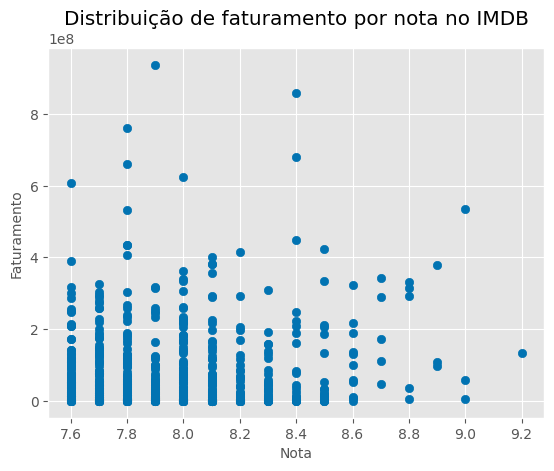

In [ ]:
# distribuição de faturamento por rating do filme
plt.style.use("ggplot")
palette = sns.color_palette("colorblind")
plt.scatter(df["IMDB_Rating"],df["Gross"],color=palette[0])
plt.suptitle("")
plt.title("Distribuição de faturamento por nota no IMDB")
plt.xlabel("Nota", fontsize=10)
plt.ylabel("Faturamento", fontsize=10)
plt.show()

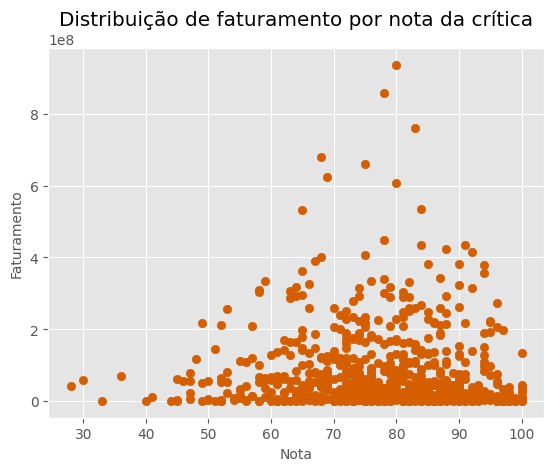

In [ ]:
# faturamento por notas da critica
plt.scatter(df["Meta_score"],df["Gross"],color=palette[3])
plt.suptitle("")
plt.title("Distribuição de faturamento por nota da crítica")
plt.xlabel("Nota", fontsize=10)
plt.ylabel("Faturamento", fontsize=10)
plt.show()

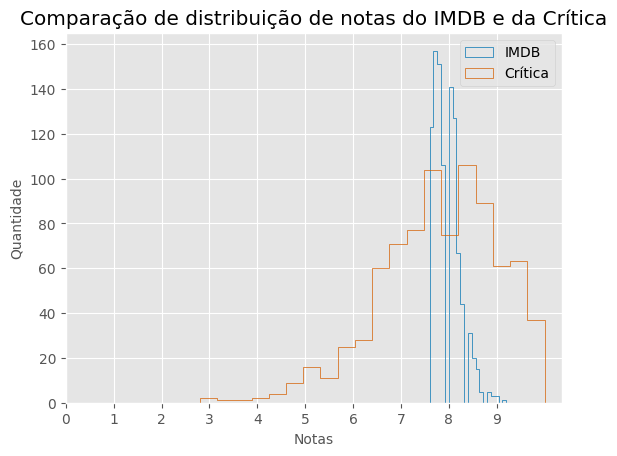

In [ ]:
plt.hist(df["IMDB_Rating"], bins=20, histtype="step", label="IMDB", color=palette[0])
plt.hist(df["Meta_score"]/10, bins=20, histtype="step", label="Crítica", color=palette[3])

plt.xlabel("Notas", fontsize=10)
plt.ylabel("Quantidade", fontsize=10)
plt.title("Comparação de distribuição de notas do IMDB e da Crítica")
plt.xticks(np.arange(0,10))
plt.legend()
plt.show()

Vemos nos gráficos que não há uma relação clara entre um faturamento mais alto e uma nota maior, tanto na nota do IMDB quanto na crítica. Por exemplo, os filmes com faturamento acima de 80 milhões, que são os maiores faturamentos, tem notas do IMDB de 7.9 e 8.4 em 10, e da crítica, 80 de 100. Além disso, quando normalizamos as notas da crítica para ficarem em escala decimal, e as comparamos com a do IMDB, vemos que ambas as distribuições se concentram em valores entre 7.7 e 8.2 aproximadamente, e não há notas menores que 7.5 no IMDB, ou que 3 na crítica. Assim, o voto popular tende a ser mais generoso com as notas do que a crítica. Com isso, o modelo de predição será enviesado a prever valores acima dessas notas, pois não há dados indicando notas piores.

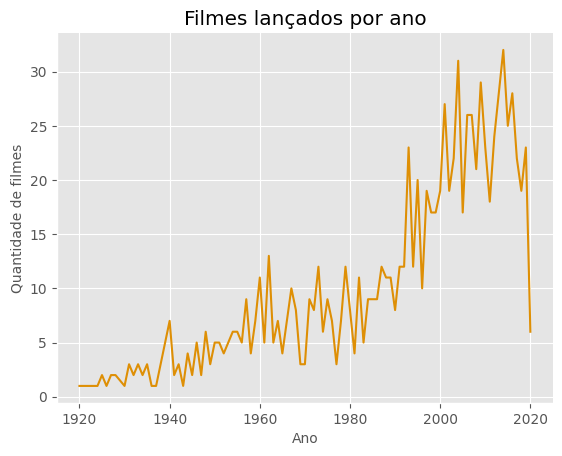

In [ ]:
# filmes lançados por ano

plt.gca().spines[['right','top']].set_visible(False)
plt.title("Filmes lançados por ano")
df["Released_Year"].value_counts().sort_index().plot(kind="line", color=palette[1])
plt.xlabel("Ano", fontsize=10)
plt.ylabel("Quantidade de filmes", fontsize=10)
plt.show()

O gráfico mostra que a indústria tem uma tendência de crescimento na produção de filmes, apesar das oscilações anuais. No entanto, em 2020 houve uma queda acentuada, ficando abaixo dos níveis vistos nos últimos 20 anos. Provavelmente, isso se deve a pandemia, que impediu as pessoas de trabalharem nesse ano.

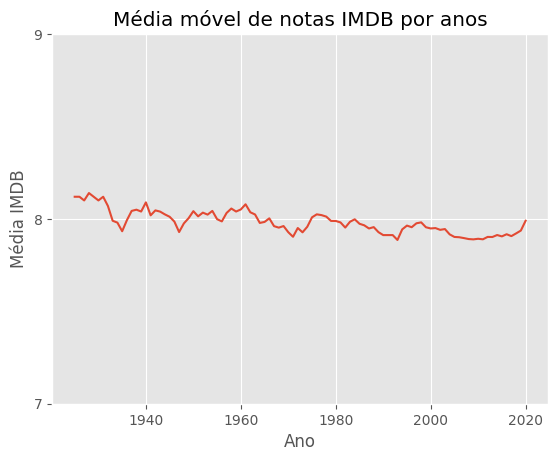

In [ ]:
# ano de lançamento X media de rating
media_anual = df.groupby("Released_Year")['IMDB_Rating'].mean()
media_movel = media_anual.rolling(window=5).mean()
plt.plot(media_movel.index, media_movel.values)
plt.xlabel("Ano")
plt.ylabel("Média IMDB")
plt.yticks(np.arange(7,10))
plt.title("Média móvel de notas IMDB por anos")
plt.show()

Neste gráfico procurei visualizar se havia relação entre as médias dos filmes em um ano e o ano de lançamento. Para avaliar a relação no longo prazo, a média usada foi a móvel, considerando uma janela de cinco anos em cada ponto de dado, para diminuir o ruído no gráfico e visualizar melhor a tendência. Porém, já era esperado que houvesse uma concentração de notas entre 7 e 8, dados os gráficos anteriores.

Assim, o gráfico começa neste valor, e é possível observar uma leve tendência de queda nos anos recentes, a partir de 2000. Isso também acontece entre 1980 e 1990, e 1960 e 1970, ou seja, parece ser algo cíclico na indústria.

O ano de 2020 mostra um pequeno salto em relação aos anteriores. É possível que isso esteja relacionado a menor quantidade de obras produzidas, enquanto mantendo as notas altas, puxou a média para cima.

In [ ]:
df['Director'].value_counts().shape

(548,)

In [ ]:
df_atores = df.melt(value_vars=["Star1","Star2","Star3","Star4"], value_name="Atores")
df_atores["Atores"].value_counts().shape

(2707,)

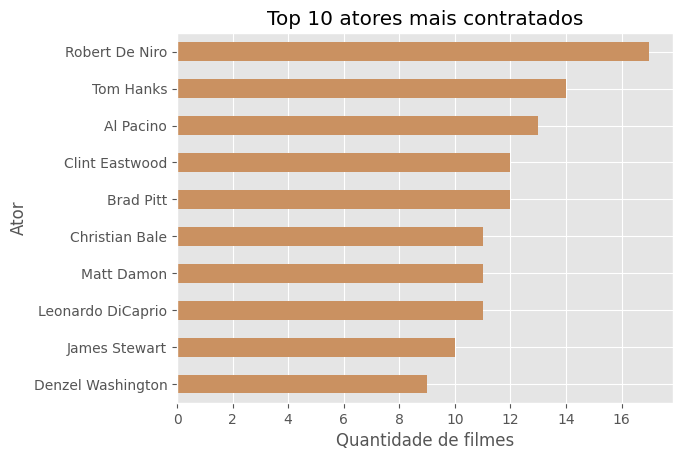

In [ ]:
# top 10 atores
df_atores["Atores"].value_counts().head(10).sort_values().plot(kind="barh",color=palette[5])
plt.title("Top 10 atores mais contratados")
plt.ylabel("Ator")
plt.xlabel("Quantidade de filmes")
plt.show()

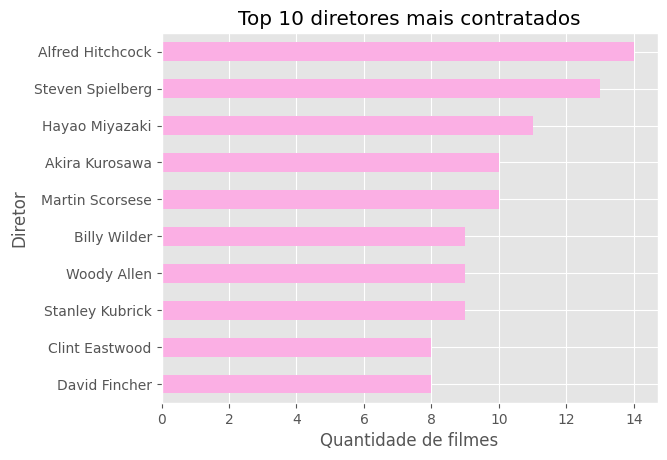

In [ ]:
# top 10 diretores
df['Director'].value_counts().head(10).sort_values().plot(kind="barh",color=palette[6])
plt.title("Top 10 diretores mais contratados")
plt.ylabel("Diretor")
plt.xlabel("Quantidade de filmes")
plt.show()

Apesar de haver 548 diretores e 2707 atores, os atores mais contratados são todos homens dos Estados Unidos, e apenas um deles é um homem negro (Denzel Washington). Entre os diretores, também há apenas homens, sendo dois japoneses, um britânico e os demais americanos. Isso pode apontar para uma desigualdade de oportunidades de carreira na indústria de cinema. Um ponto interessante é que Clint Eastwood aparece tanto na lista de atores quanto de diretores.

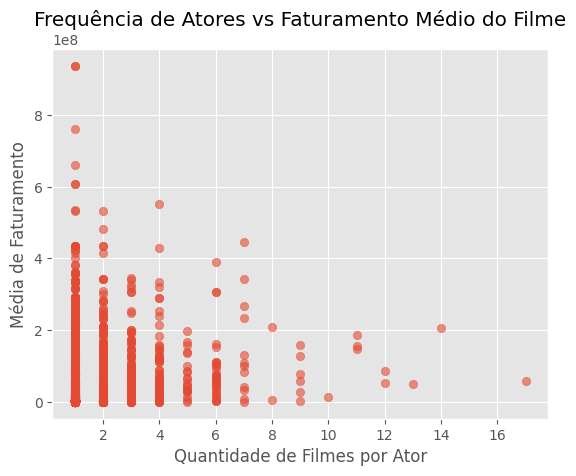

In [ ]:
df_atores = df.melt(value_vars=["Star1","Star2","Star3","Star4"],id_vars=["Gross"],value_name="Ator")
estatisticas_atores = df_atores.groupby("Ator").agg(freq=("Ator", "count"),avg_gross=("Gross", "mean")).reset_index()
plt.scatter(estatisticas_atores["freq"], estatisticas_atores["avg_gross"], alpha=0.6)
plt.xlabel("Quantidade de Filmes por Ator")
plt.ylabel("Média de Faturamento")
plt.title("Frequência de Atores vs Faturamento Médio do Filme")
plt.show()

Nesse gráfico visualizamos a frequência média com que os atores aparecem no dataset versus o faturamento médio dos filmes deles. Novamente não há correlação clara entre estar em mais filmes e ter mais faturamento, há poucos dados para mais de 8 filmes por ator, e eles ficam na faixa de até 200 milhões de dólares. Olhando para o início do gráfico, também não vemos relação entre estar em menos filmes e ter uma média de faturamento mais alta, pois os pontos nas colunas tem grande variação vertical.

In [ ]:
df['Certificate'].value_counts()

,count
Certificate,
U,234
A,196
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11


# Qual filme recomendaria para um desconhecido?

Recomendaria um filme com boa nota IMDB, isto é, acima da mediana, porém com faturamento abaixo da mediana, porque seria um filme bom mas que o faturamento indicaria que a pessoa não conheceria. Assim, de acordo com a tabela abaixo, seria o filme com maior nota entre os dez com menor faturamento, que é City Lights.

In [ ]:
# calculando as medianas tirando as linhas com valores nan
median_imdb = pd.to_numeric(df['IMDB_Rating'], errors='coerce').median()
median_gross = pd.to_numeric(df['Gross'], errors='coerce').median()
df[(pd.to_numeric(df['IMDB_Rating'], errors='coerce') > median_imdb) & (pd.to_numeric(df['Gross'], errors='coerce') < median_gross)][["Series_Title","IMDB_Rating","Gross"]].sort_values(
    by=['Gross','IMDB_Rating'],ascending=[True,False]).head(10)

,Series_Title,IMDB_Rating,Gross
389,Knockin' on Heaven's Door,8.0,3296.0
140,Udaan,8.2,7461.0
355,Tropa de Elite,8.0,8060.0
189,All About Eve,8.2,10177.0
349,Dev.D,8.0,10950.0
186,Dial M for Murder,8.2,12562.0
238,Salinui chueok,8.1,14131.0
51,City Lights,8.5,19181.0
316,La passion de Jeanne d'Arc,8.1,21877.0
124,M - Eine Stadt sucht einen Mörder,8.3,28877.0


# Coluna Overview
A coluna overview possui um pequeno resumo sobre o filme. É possível inferir o gênero de alguns filmes, por exemplo, vemos na primeira linha que diz 'Uma dinastia do crime organizado', terá o tema crime. Possivelmente um modelo de processamento de linguagem natural semelhante a análise de sentimentos deve ser capaz de atribuir corretamente alguns temas.

In [ ]:
# visualizacao de textos do overview
display(df['Overview'][0])

"An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son."

In [ ]:
# visualizacao de textos do overview
display(df['Overview'][59])

'The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.'

# Fatores relacionados ao Faturamento

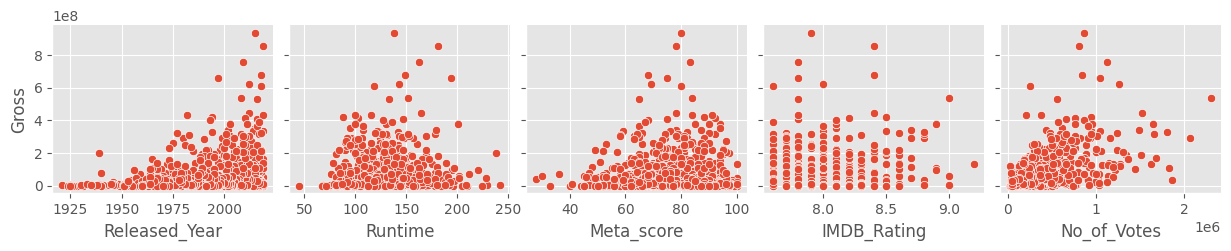

In [ ]:
col_numericas = df[['Released_Year','Runtime','Meta_score','IMDB_Rating','No_of_Votes','Gross']]
subset = col_numericas[['Gross'] +[col for col in col_numericas.columns if col != 'Gross']]
sns.pairplot(subset, x_vars=[c for c in subset.columns if c != 'Gross'], y_vars=['Gross'],diag_kind='kde')
plt.show()

## Fatores numéricos
Não parece haver correlação linear entre os dados numéricos, mas pode-se observar que os filmes de maior faturamento (acima de 60 milhões), ocorreram a maioria depois dos anos 2000, tem duração entre 100 e 200 minutos e nota da crítica entre 60 e 80. No caso da nota IMDB e Número de Votos, os dados estão mais distribuídos, e não parece haver padrão.

/tmp/ipython-input-1115669968.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=director_gross.head(20), x="Gross", y="Director", palette=palette)


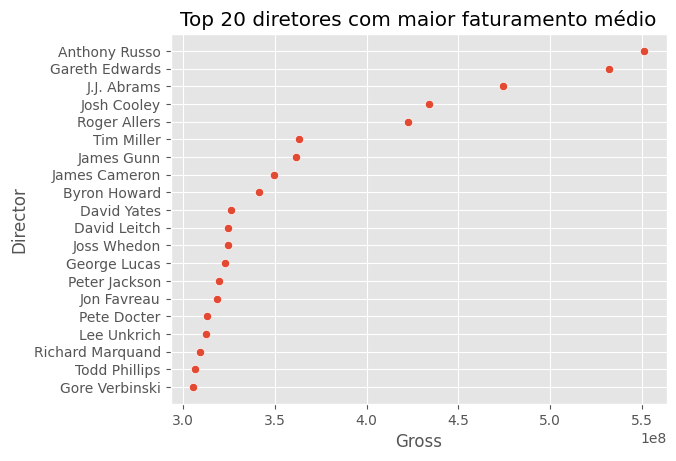

In [ ]:
director_gross = df.groupby("Director")['Gross'].mean().reset_index()
director_gross = director_gross.sort_values("Gross", ascending=False)

sns.scatterplot(data=director_gross.head(20), x="Gross", y="Director", palette=palette)
plt.title("Top 20 diretores com maior faturamento médio")
plt.show()

Os dez primeiros diretores tem maior distância entre seus faturamentos médio, mesmo a lista incluindo diretores como James Cameron , que dirigiu Avatar e gerou 2.9 bilhões de dólares no mundo, e Anthony Russo, (Vingadores: Endgame), gerando 2.8 bilhões de dólares. Provavelmente isso indica que eles têm mais filmes na lista que outros diretores com filmes de faturamento menor, assim puxando a média para cima. Além disso, pesquisando os nomes dos diretores vi que eles trabalharam principalmente em estúdios americanos grandes, como Warner Bros, Disney, Universal e Sony, o que aponta que um fator para o grande faturamento é ser produzido por um grande estúdio dos EUA.

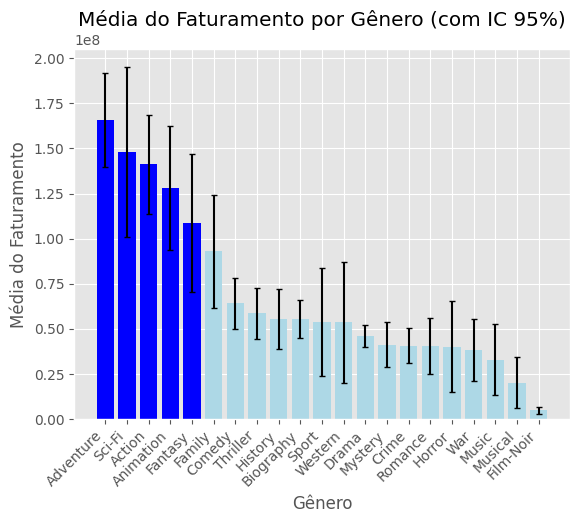

In [ ]:
# Separa os gêneros
df['Lista_Generos'] = df['Genre'].str.split(",")
df_explode = df.explode("Lista_Generos")
df_explode["Lista_Generos"] = df_explode["Lista_Generos"].str.strip()

# cálculo da média e intervalo de confiança
stats = df_explode.groupby("Lista_Generos")["Gross"].agg(["mean", "count", "std"])
stats["sem"] = stats["std"] / np.sqrt(stats["count"])  # erro padrão
stats["ci95"] = 1.96 * stats["sem"]  # intervalo de confiança em 95%

stats = stats.sort_values("mean", ascending=False)

# ênfase no top 5
cores = ["blue" if i < 5 else "lightblue" for i in range(len(stats))]

plt.bar(stats.index, stats["mean"], yerr=stats["ci95"], color=cores, capsize=2)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Gênero")
plt.ylabel("Média do Faturamento")
plt.title("Média do Faturamento por Gênero (com IC 95%)")
plt.show()

No gráfico acima visualizei a média do faturamento com intervalo de confiança, isto é, o intervalo indica que entre seu valor mínimo e máximo tem-se 95% de confiança que ele cubra a média verdadeira da população. A maioria dos gêneros tem intervalos largos, de diferenças de 50 milhões entre o valor mínimo e máximo, o que indica que o tamanho da amostra foi pequeno e que temos menos precisão na média. Considerando essas limitações, os gêneros com maior faturamento médio são Aventura, Sci-fi, Ação, Animação e Fantasia, todos com média acima de 100 milhões.

# Modelo

## Variáveis e Transformações
O modelo escolhido deve ser capaz de lidar com valores faltantes, pois as colunas Meta_score e Gross não serão preenchidas. Escolhi deixar os valores em branco pois há grande variação nas notas da crítica e no faturamento, não fazendo sentido assim, preencher os valores com a média por exemplo.

As colunas Unnamed:0 e Series_Title serão retiradas, pois a primeira é apenas um índice de linhas, que não acrescenta informação ao modelo, e o título também é uma categoria única por linha, como se fosse um índice.


Para a coluna dos nomes dos Atores e dos Diretores será mapeada a frequência com que o nome aparece no dataset e esse dado será utilizado, pois haveria problemas de dimensionalidade criar mais de 3000 colunas binárias para cada nome.

A coluna Overview poderia ser processada para se tornar embeddings numéricos, mas para manter a simplicidade do modelo e não deixá-lo computacionalmente pesado, será testado sem essa coluna para ver o resultado.

As colunas Gênero e Certificate serão transformadas usando One Hot Encoding, pois tem poucas categorias, assim espero que não aconteça a "maldição da dimensionalidade" que poderia ocorrer com Atores, isto é, a perda de desempenho do modelo devido a dados esparsos.

## Escolha do modelo

### Tipo de problema resolvido
Este é um problema de regressão, pois não estamos tentando atribuir categorias, mas sim um número de ponto flutuante de 0.0 a 10.0.

Como há variáveis em diferentes escalas, por exemplo o faturamento em milhões, anos em milhares, variáveis binárias, decidi escolher árvores de decisão de regressão, pois elas não são sensíveis a mudança de magnitudes. Além disso, elas possuem implementações que podem lidar com valores faltantes, como Histogram Gradient Boosting Regressor.

Este modelo combina árvores no modelo boosting, isto é, há várias camadas de árvores, e as mais de baixo tem por objetivo minimizar os erros das mais de cima.

### Vantagens

Este modelo pode lidar com datasets grandes, e é mais rápido que o Gradient Boost, além de lidar com missing values, ter robustez a outliers e não necessitar de muitas mudanças na feature scaling.

## Desvantagens

Se houver muitas camadas de árvores (for mais profundo), pode ocorrer overfitting, está sujeito a instabilidade, pois mudanças nos dados afetam as divisões nos galhos das árvores, e lentidão nas predições em teste.

## Métrica

Para esse caso, em que as notas se concentram num intervalo e não há muitos outliers entre elas, será usado o erro quadrático médio, pois ele produz uma função de gradiente suave e diferenciável, o que faz o Histogram Gradient Boosting corrigir os erros com mais eficiência, além de não ser um cálculo computacionalmente custoso

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Divisão treino teste
# a coluna unnamed foi removida pois é apenas um índice de linhas
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['IMDB_Rating','Unnamed: 0','Overview','Series_Title'],axis=1),df['IMDB_Rating'], test_size=0.3, random_state=42)

# Reseta os indices de linhas
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# Pré processamento do certificado

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Cria as colunas binárias de acordo apenas com as categorias vistas no treino
ohe_encode = ohe.fit_transform(X_train[['Certificate']])
cols = ohe.get_feature_names_out(['Certificate']) # Pass the original column name

encode_train = pd.DataFrame(ohe_encode, columns=cols, index=X_train.index)
X_train = pd.concat([X_train.drop('Certificate',axis=1), encode_train],axis=1)

encode_test = pd.DataFrame(ohe.transform(X_test[['Certificate']]), columns=cols,index=X_test.index)
X_test = pd.concat([X_test.drop('Certificate',axis=1), encode_test],axis=1)

In [ ]:
## Encoding do Gênero

# Aplica one hot encoding a uma coluna com multiplos valores por linha
mlb = MultiLabelBinarizer()

# Cria uma coluna separando os generos por virgula
X_train['Lista_Generos'] = X_train['Genre'].str.split(",").apply(lambda x: [g.strip() for g in x])
X_test['Lista_Generos'] = X_test['Genre'].str.split(",").apply(lambda x: [g.strip() for g in x])


encode = pd.DataFrame(mlb.fit_transform(X_train['Lista_Generos']),columns=mlb.classes_,index=X_train.index)
encode_test = pd.DataFrame(mlb.transform(X_test['Lista_Generos']),columns=mlb.classes_,index=X_test.index)

X_train = pd.concat([X_train.drop(columns=['Genre', 'Lista_Generos']), encode], axis=1)
X_test = pd.concat([X_test.drop(columns=['Genre', 'Lista_Generos']), encode_test], axis=1)

In [ ]:
## Mapeamento de frequencias de Atores e Diretores

X_train_atores = pd.concat([X_train[col] for col in ['Star1','Star2','Star3','Star4']])

contagem = X_train_atores.value_counts()
# Mapeamento apenas com base no treino pra evitar vazamento de dados
for col in ['Star1','Star2','Star3','Star4']:
  X_train[col + '_Freq'] = X_train[col].map(contagem)
  X_test[col + '_Freq'] = X_test[col].map(contagem)

# Atores não vistos no treino tem contagem zero
for col in ['Star1','Star2','Star3','Star4']:
  X_test[col+ "_Freq"] = X_test[col+"_Freq"].fillna(0)

# Mapeamento de Diretores da mesma forma
contagem_dir = X_train['Director'].value_counts()
X_train['Director_Freq'] = X_train['Director'].map(contagem_dir)
X_test['Director_Freq'] = X_test['Director'].map(contagem_dir)
X_test['Director_Freq'] = X_test['Director_Freq'].fillna(0)


In [ ]:
X_train.drop(columns=['Director','Star1','Star2','Star3','Star4'], inplace=True)

In [ ]:
X_test.drop(columns=['Director','Star1','Star2','Star3','Star4'], inplace=True)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
## Treino e teste
model = HistGradientBoostingRegressor(random_state=32, loss='squared_error')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Erro do modelo:", round(mean_squared_error(y_test, y_pred),3))



Erro do modelo: 0.038


# Previsão da nota de 'The Shawshank Redemption'



In [ ]:
data = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

# Pré processamento igual aos anteriores

df_test = pd.DataFrame(data, index=[0])
df_test.drop(columns=["Overview","Series_Title"], inplace=True)
df_test['Gross'] = df_test['Gross'].str.replace(",","").astype(float)
df_test['Released_Year'] = df_test['Released_Year'].astype("int64")
df_test['Runtime'] = df_test['Runtime'].str.strip('min').astype('int64')

# Encoding de certificate
encode_df = pd.DataFrame(ohe.transform(df_test[['Certificate']]), columns=cols,index=df_test.index)
df_test = pd.concat([df_test.drop('Certificate',axis=1), encode_df],axis=1)

# Encoding de genero
df_test['Genre'] = df_test['Genre'].apply(lambda x: [x])

encode_shaw = pd.DataFrame(mlb.transform(df_test['Genre']), columns=mlb.classes_)
df_test = pd.concat([df_test.drop(columns=['Genre']), encode_shaw], axis=1)

# Encoding de Atores e Diretor
for col in ['Star1','Star2','Star3','Star4']:
  df_test[col + '_Freq'] = df_test[col].map(contagem)

for col in ['Star1','Star2','Star3','Star4']:
  df_test[col+ "_Freq"] = df_test[col+"_Freq"].fillna(0)

df_test['Director_Freq'] = df_test['Director'].map(contagem_dir)

df_test.columns = df_test.columns.astype(str)
df_test.drop(columns=['Director','Star1','Star2','Star3','Star4'],inplace=True)

nota_imdb = model.predict(df_test)

print("Nota de The Shawshank Redemption:", nota_imdb)

Nota de The Shawshank Redemption: [8.72315335]


Atualmente, The Shawshank Redemption tem nota de 9.3 no IMDB, uma diferença 6,88% em relação ao modelo, que previu 8.7. É uma nota maior do que a maior nota do dataset, de 9.2, e como foi dito antes, as notas se concentram entre 7 e 8. Considerando o erro quadrático médio do modelo de 3%, e que esse filme é uma exceção, o modelo é confiável.

# Salvamento do modelo

In [ ]:
import joblib

# Salvar o modelo
joblib.dump(model, 'model.pkl')

# Carregar o modelo model
loaded_model = joblib.load('model.pkl')

# # Uso do modelo - descomentar estas linhas para uso
y_pred_model = loaded_model.predict(X_test)
# Checar o erro
mean_squared_error(y_test, y_pred_model)

0.03785317723096688